In [ ]:
# Set Working Directory
from google.colab import drive
drive.mount('/content/gdrive')

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

# Importing the dataset
data = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/files/Customers.csv")
print("Input Data and Shape")
print(data.shape)
data.head()

Mounted at /content/gdrive
Input Data and Shape
(2000, 8)


,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


In [ ]:
data.rename(columns = {'Annual Income ($)':'Annual Income'}, inplace = True)
data.rename(columns = {'Spending Score (1-100)':'Spending Score'}, inplace = True)
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data["Gender"] = le.fit_transform(data["Gender"])
data["Profession"] = le.fit_transform(data["Profession"])

to_drop = ["CustomerID"]
data.drop(to_drop, inplace=True, axis=1)

data = data.dropna(axis = 0)
data

,Gender,Age,Annual Income,Spending Score,Profession,Work Experience,Family Size
0,1,19,15000,39,5,1,4
1,1,21,35000,81,2,3,3
2,0,20,86000,6,2,1,1
3,0,23,59000,77,7,0,2
4,0,31,38000,40,3,2,6
...,...,...,...,...,...,...,...
1995,0,71,184387,40,0,8,7
1996,0,91,73158,32,1,7,7
1997,1,87,90961,14,5,9,2
1998,1,77,182109,4,4,7,2


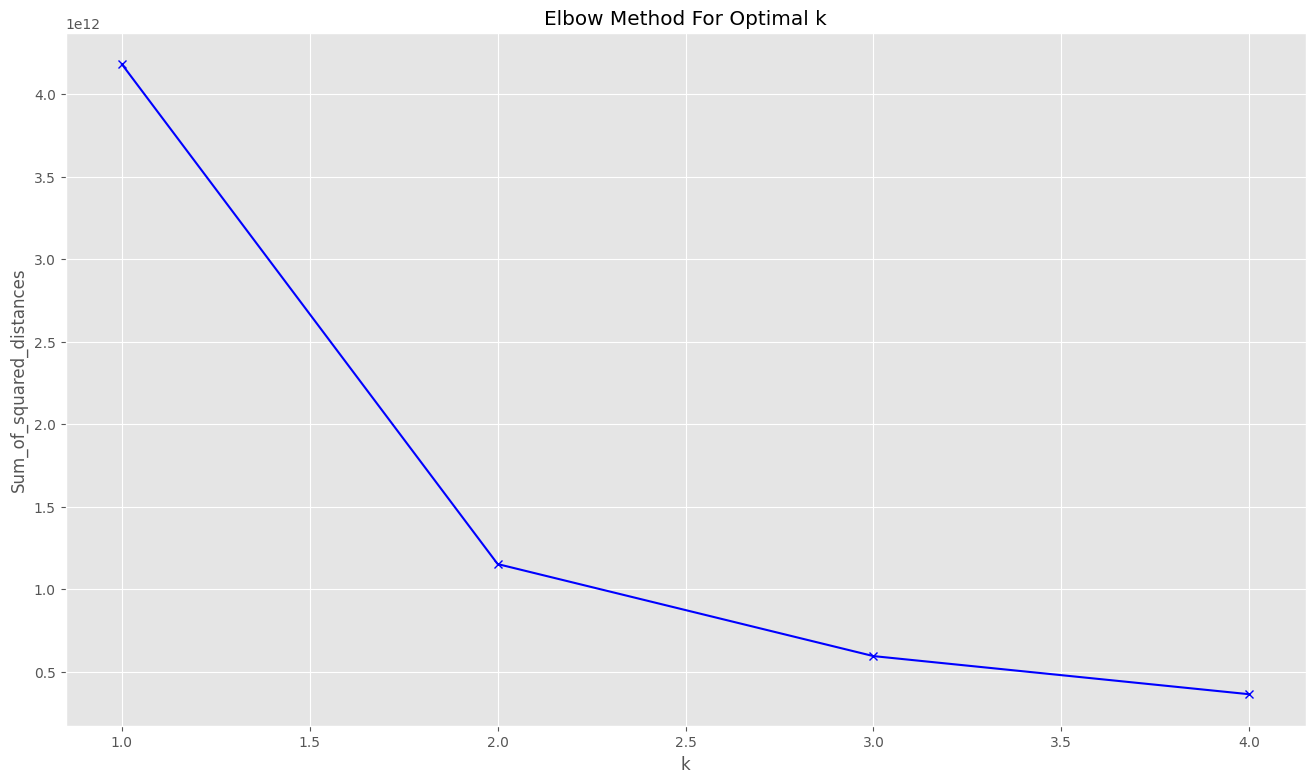

In [ ]:
# Implement the algorithm using scikit-learn
from sklearn.cluster import KMeans

K = range(1, 5)
sum_of_squared_distances = []

for k in K:
  kmeans = KMeans(n_clusters = k, init= "k-means++", n_init= "auto", max_iter= 300, tol= 0.0001, verbose= 0, random_state= None, copy_x= True, algorithm= "lloyd")
  kmeans = kmeans.fit(data)
  sum_of_squared_distances.append(kmeans.inertia_)

plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
k = 2
kmeans = KMeans(n_clusters = k, init= "k-means++", n_init= "auto", max_iter= 300, tol= 0.0001, verbose= 0, random_state= None, copy_x= True, algorithm= "lloyd")

kmeans.fit(data)

centroids = kmeans.cluster_centers_

labels = kmeans.labels_

print(centroids)
print(labels)
label = kmeans.fit_predict(data)
print(label)

[[4.12635735e-01 4.86574531e+01 7.23160069e+04 4.98213228e+01
  2.84995064e+00 3.79763080e+00 3.58341560e+00]
 [4.01215805e-01 4.92705167e+01 1.50159603e+05 5.21337386e+01
  3.02938197e+00 4.41540020e+00 3.95845998e+00]]
[0 0 0 ... 0 1 0]
[1 1 1 ... 1 0 1]


zeros : 987
ones : 1013


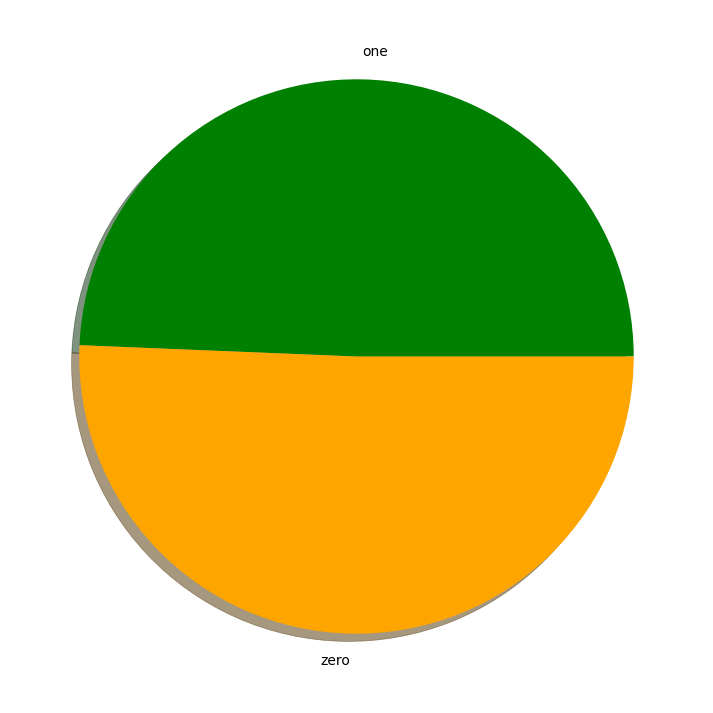

In [ ]:
zero = list(label).count(0)

# count diabetic patients
one = list(label).count(1)

# depict illustration
x_axis = []
x_axis.append(zero)
x_axis.append(one)

colors = ['green', 'orange']

print("zeros : " + str(x_axis[0]) +
      "\nones : " + str(x_axis[1]))

y = ['one', 'zero']

plt.pie(x_axis, labels=y, colors=colors, shadow='true')
plt.show()

In [ ]:
data2 = pd.DataFrame(label)
#data3 = [data ,data2]
#header = ['', 'label']
diffrence = pd.concat([data,data2])
diffrence.to_csv('cs.csv',index=False)